# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Bora Dere
## Student ID: 2220765021

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

### Imports and loading the dataset

In [1]:
# import mecessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# load the dataset
data = pd.read_csv('data.csv')

In [2]:
df = pd.DataFrame(data)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Data cleaning

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The last column is null. So, it will be dropped.

In [4]:
# dropping the last column
df.drop(df.columns[-1], axis=1, inplace=True)

ID column is unnecessary for classification, it will be removed too.

In [5]:
df.drop(['id'], axis=1, inplace=True)

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Outlier handling

In [7]:
# self plagiarism from my previous assignment


def outlier_finder(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    inner_lower_fence = Q1 - 1.5*IQR
    inner_upper_fence = Q3 + 1.5*IQR

    outer_lower_fence = Q1 - 3*IQR
    outer_upper_fence = Q3 + 3*IQR

    mild_outliers = [i for i in data if (i < inner_lower_fence and i > outer_lower_fence) or (i > inner_upper_fence and i < outer_upper_fence)]
    extreme_outliers = [i for i in data if i < outer_lower_fence or i > outer_upper_fence]

    return mild_outliers, extreme_outliers


def outlier_printer(outliers, feature):
    mild_outliers = outliers[0]
    extreme_outliers = outliers[1]
    
    if len(mild_outliers) != 0:
        # to achieve a better output format
        o1 = f"There are {len(mild_outliers)} mild outliers in the {feature} feature."
        o2 = f"{mild_outliers[0]} is a mild outlier for the {feature} feature."

        print(o1)
        print("-"*len(o1 if len(o1) > len(o2) else o2))
        
        for i in mild_outliers:
            print(f"{i} is a mild outlier for the {feature} feature.")

        print()

    if len(extreme_outliers) != 0:
        o1 = f"There are {len(extreme_outliers)} extreme outliers in the {feature} feature."
        o2 = f"{extreme_outliers[0]} is an extreme outlier for the {feature} feature."

        print(o1)
        print("-"*len(o1 if len(o1) > len(o2) else o2))
        
        for i in extreme_outliers:
            print(f"{i} is an extreme outlier for the {feature} feature.")

In [8]:
outliers_d = {}

for column in df.columns[1:]:
    print(f"Outliers for {column}:")
    print("-"*len(f"Outliers for {column}:"))
    outliers = outlier_finder(df[column])
    outlier_printer(outliers, column)
    outliers_d[column] = outliers
    if column != df.columns[-1]:
        print("\n")

Outliers for radius_mean:
-------------------------
There are 13 mild outliers in the radius_mean feature.
------------------------------------------------------
25.22 is a mild outlier for the radius_mean feature.
22.27 is a mild outlier for the radius_mean feature.
24.25 is a mild outlier for the radius_mean feature.
23.27 is a mild outlier for the radius_mean feature.
27.22 is a mild outlier for the radius_mean feature.
23.29 is a mild outlier for the radius_mean feature.
23.21 is a mild outlier for the radius_mean feature.
23.51 is a mild outlier for the radius_mean feature.
25.73 is a mild outlier for the radius_mean feature.
22.01 is a mild outlier for the radius_mean feature.
27.42 is a mild outlier for the radius_mean feature.
23.09 is a mild outlier for the radius_mean feature.
24.63 is a mild outlier for the radius_mean feature.

There are 1 extreme outliers in the radius_mean feature.
--------------------------------------------------------
28.11 is an extreme outlier for th

In terms of outlier handling, just removing them found convenient.

In [9]:
outlier_removed_df = df.copy()

for key, value in outliers_d.items():
    outlier_removed_df = outlier_removed_df[~outlier_removed_df[key].isin(value[1])]
    outlier_removed_df = outlier_removed_df[~outlier_removed_df[key].isin(value[0])]

outlier_removed_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


### Converting non-numeric variable

In [10]:
outlier_removed_df['diagnosis'].replace({'M':1, 'B':0}, inplace=True)
outlier_removed_df.value_counts('diagnosis')

diagnosis
0    300
1     98
Name: count, dtype: int64

### Normalization

In [11]:
from sklearn.preprocessing import normalize

In [12]:
normalized_data = normalize(outlier_removed_df.iloc[:, 1:])
normalized_data = pd.DataFrame(normalized_data, columns=outlier_removed_df.columns[1:])

normalized_data.reset_index(drop=True, inplace=True)
outlier_removed_df.reset_index(drop=True, inplace=True)

normalized_data['diagnosis'] = outlier_removed_df['diagnosis']
normalized_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.009483,0.010382,0.062147,0.540411,0.000049,0.000057,0.000059,0.000038,0.000093,0.000030,...,0.014373,0.079607,0.834520,0.000075,0.000134,0.000197,0.000100,0.000159,0.000043,1
1,0.012712,0.019313,0.083631,0.535813,0.000110,0.000153,0.000087,0.000055,0.000204,0.000069,...,0.026091,0.102545,0.831674,0.000153,0.000341,0.000248,0.000144,0.000296,0.000107,1
2,0.011360,0.016479,0.072824,0.565713,0.000058,0.000047,0.000023,0.000024,0.000108,0.000040,...,0.024024,0.087786,0.815455,0.000084,0.000110,0.000103,0.000071,0.000209,0.000060,1
3,0.010335,0.011717,0.067850,0.511496,0.000064,0.000085,0.000065,0.000043,0.000121,0.000040,...,0.017866,0.089397,0.850747,0.000091,0.000367,0.000260,0.000119,0.000248,0.000069,1
4,0.013360,0.020188,0.087412,0.659763,0.000071,0.000084,0.000084,0.000045,0.000156,0.000045,...,0.023316,0.094408,0.738830,0.000095,0.000162,0.000196,0.000094,0.000237,0.000053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.016140,0.036240,0.103382,0.644477,0.000102,0.000073,0.000078,0.000029,0.000196,0.000072,...,0.044786,0.111327,0.746481,0.000154,0.000203,0.000306,0.000081,0.000297,0.000091,0
394,0.020885,0.056039,0.133287,0.652330,0.000183,0.000155,0.000122,0.000056,0.000323,0.000124,...,0.070855,0.141203,0.725803,0.000281,0.000347,0.000406,0.000185,0.000452,0.000168,0
395,0.014646,0.022767,0.096758,0.659609,0.000085,0.000134,0.000103,0.000038,0.000146,0.000062,...,0.027374,0.106304,0.736301,0.000103,0.000318,0.000368,0.000111,0.000227,0.000080,0
396,0.014965,0.028918,0.097330,0.639496,0.000106,0.000120,0.000048,0.000046,0.000164,0.000066,...,0.035330,0.106725,0.752718,0.000132,0.000241,0.000141,0.000112,0.000240,0.000089,0


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


<AxesSubplot: >

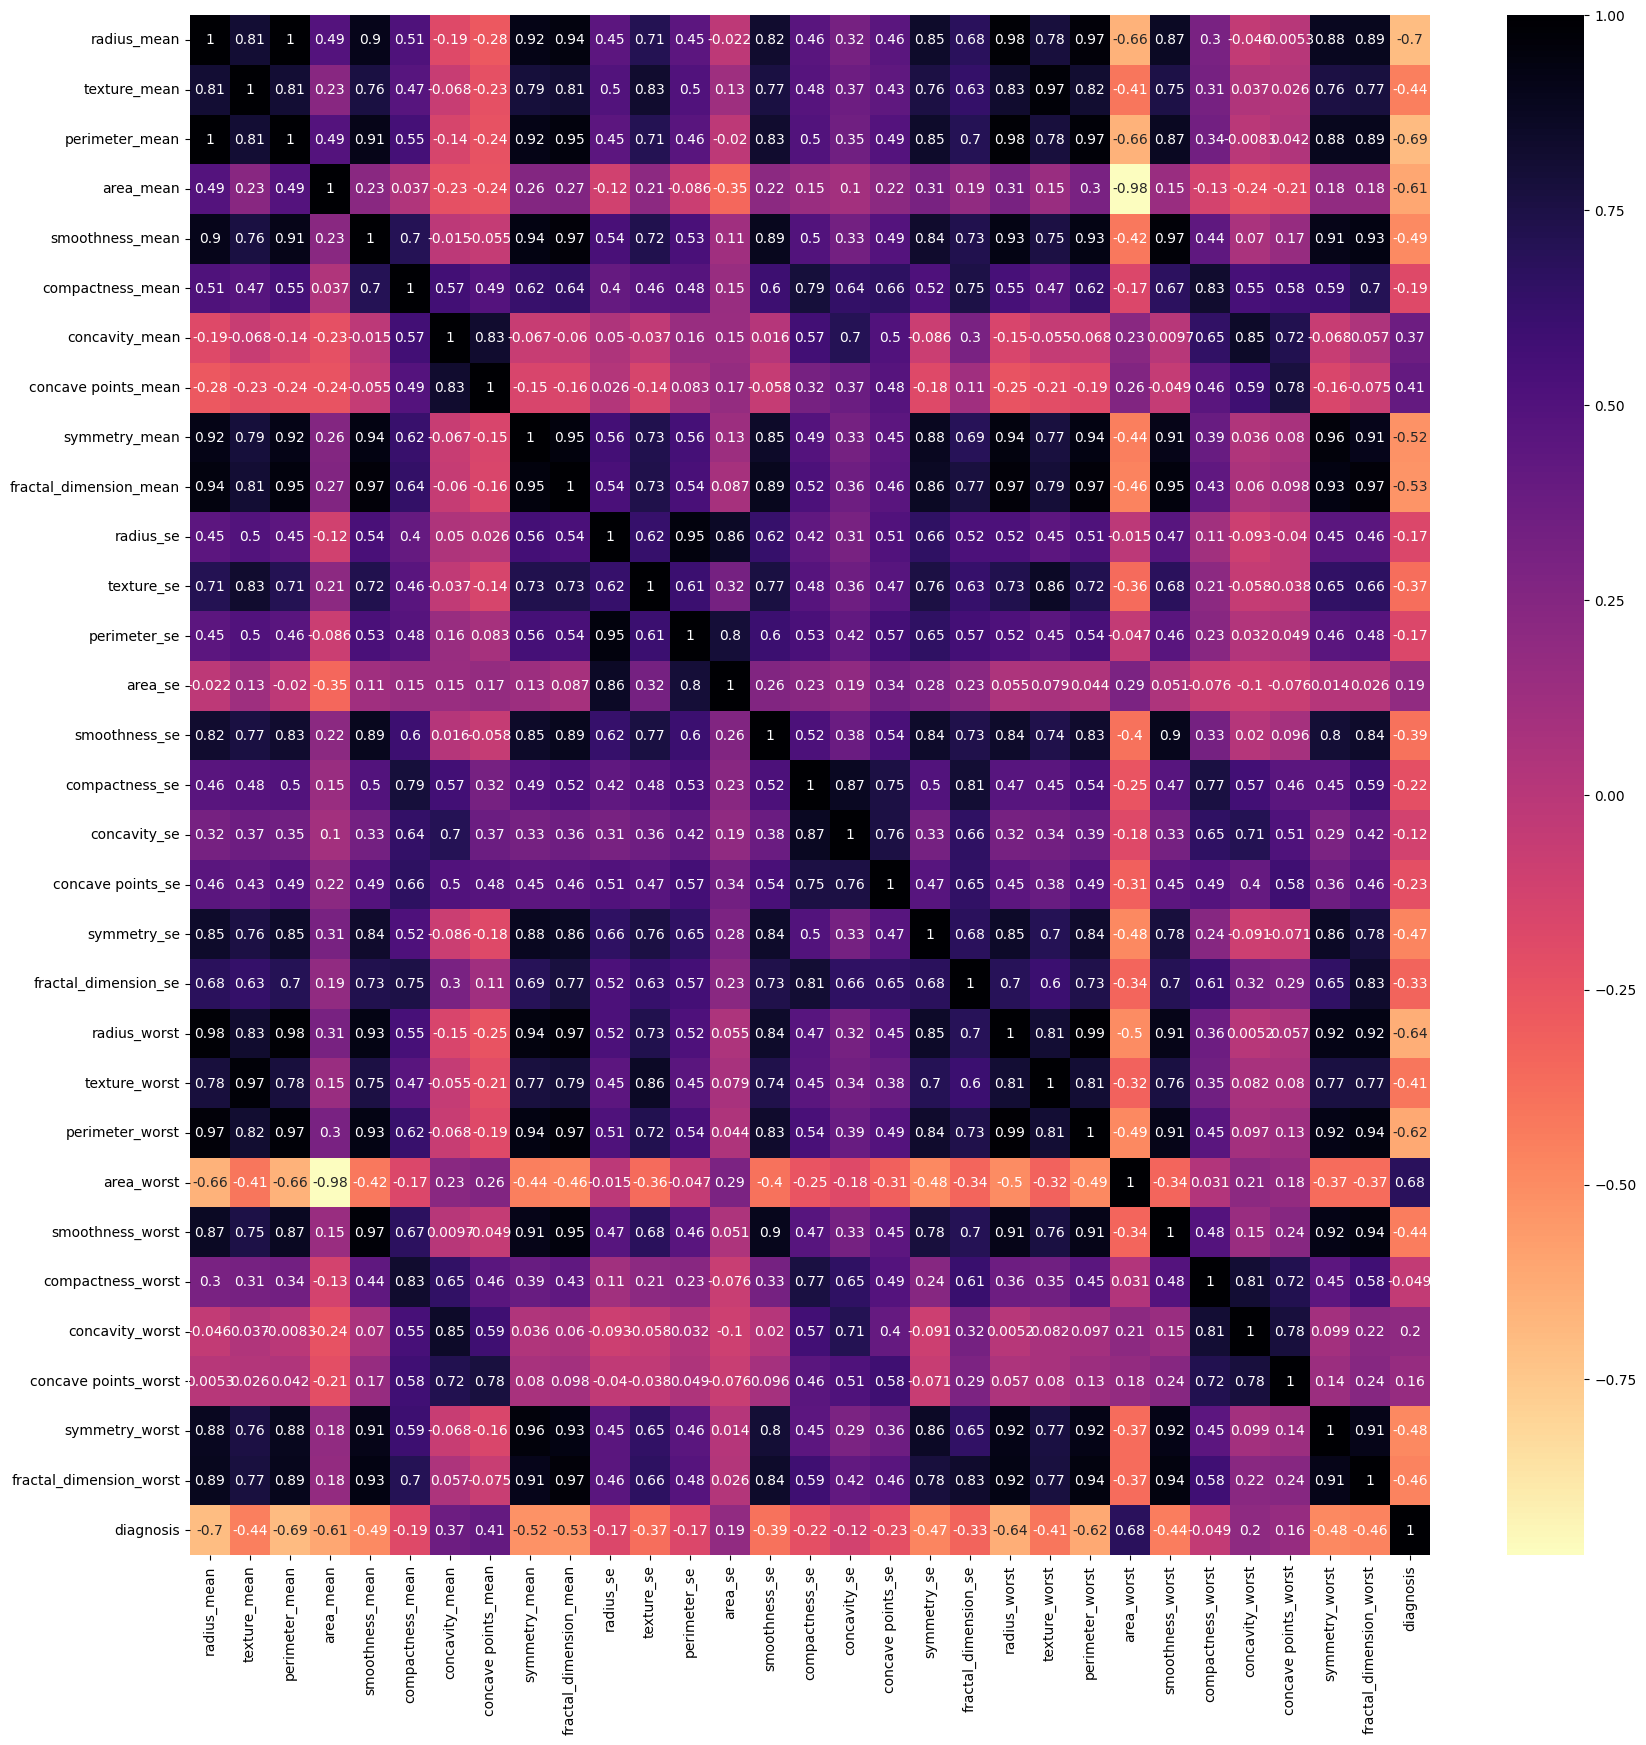

In [13]:
corr = normalized_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='magma_r')

Since data is actually formed by 10 features' mean, standard error and the worst values, they can be visualized in groups of 10.

### Visualizing mean features

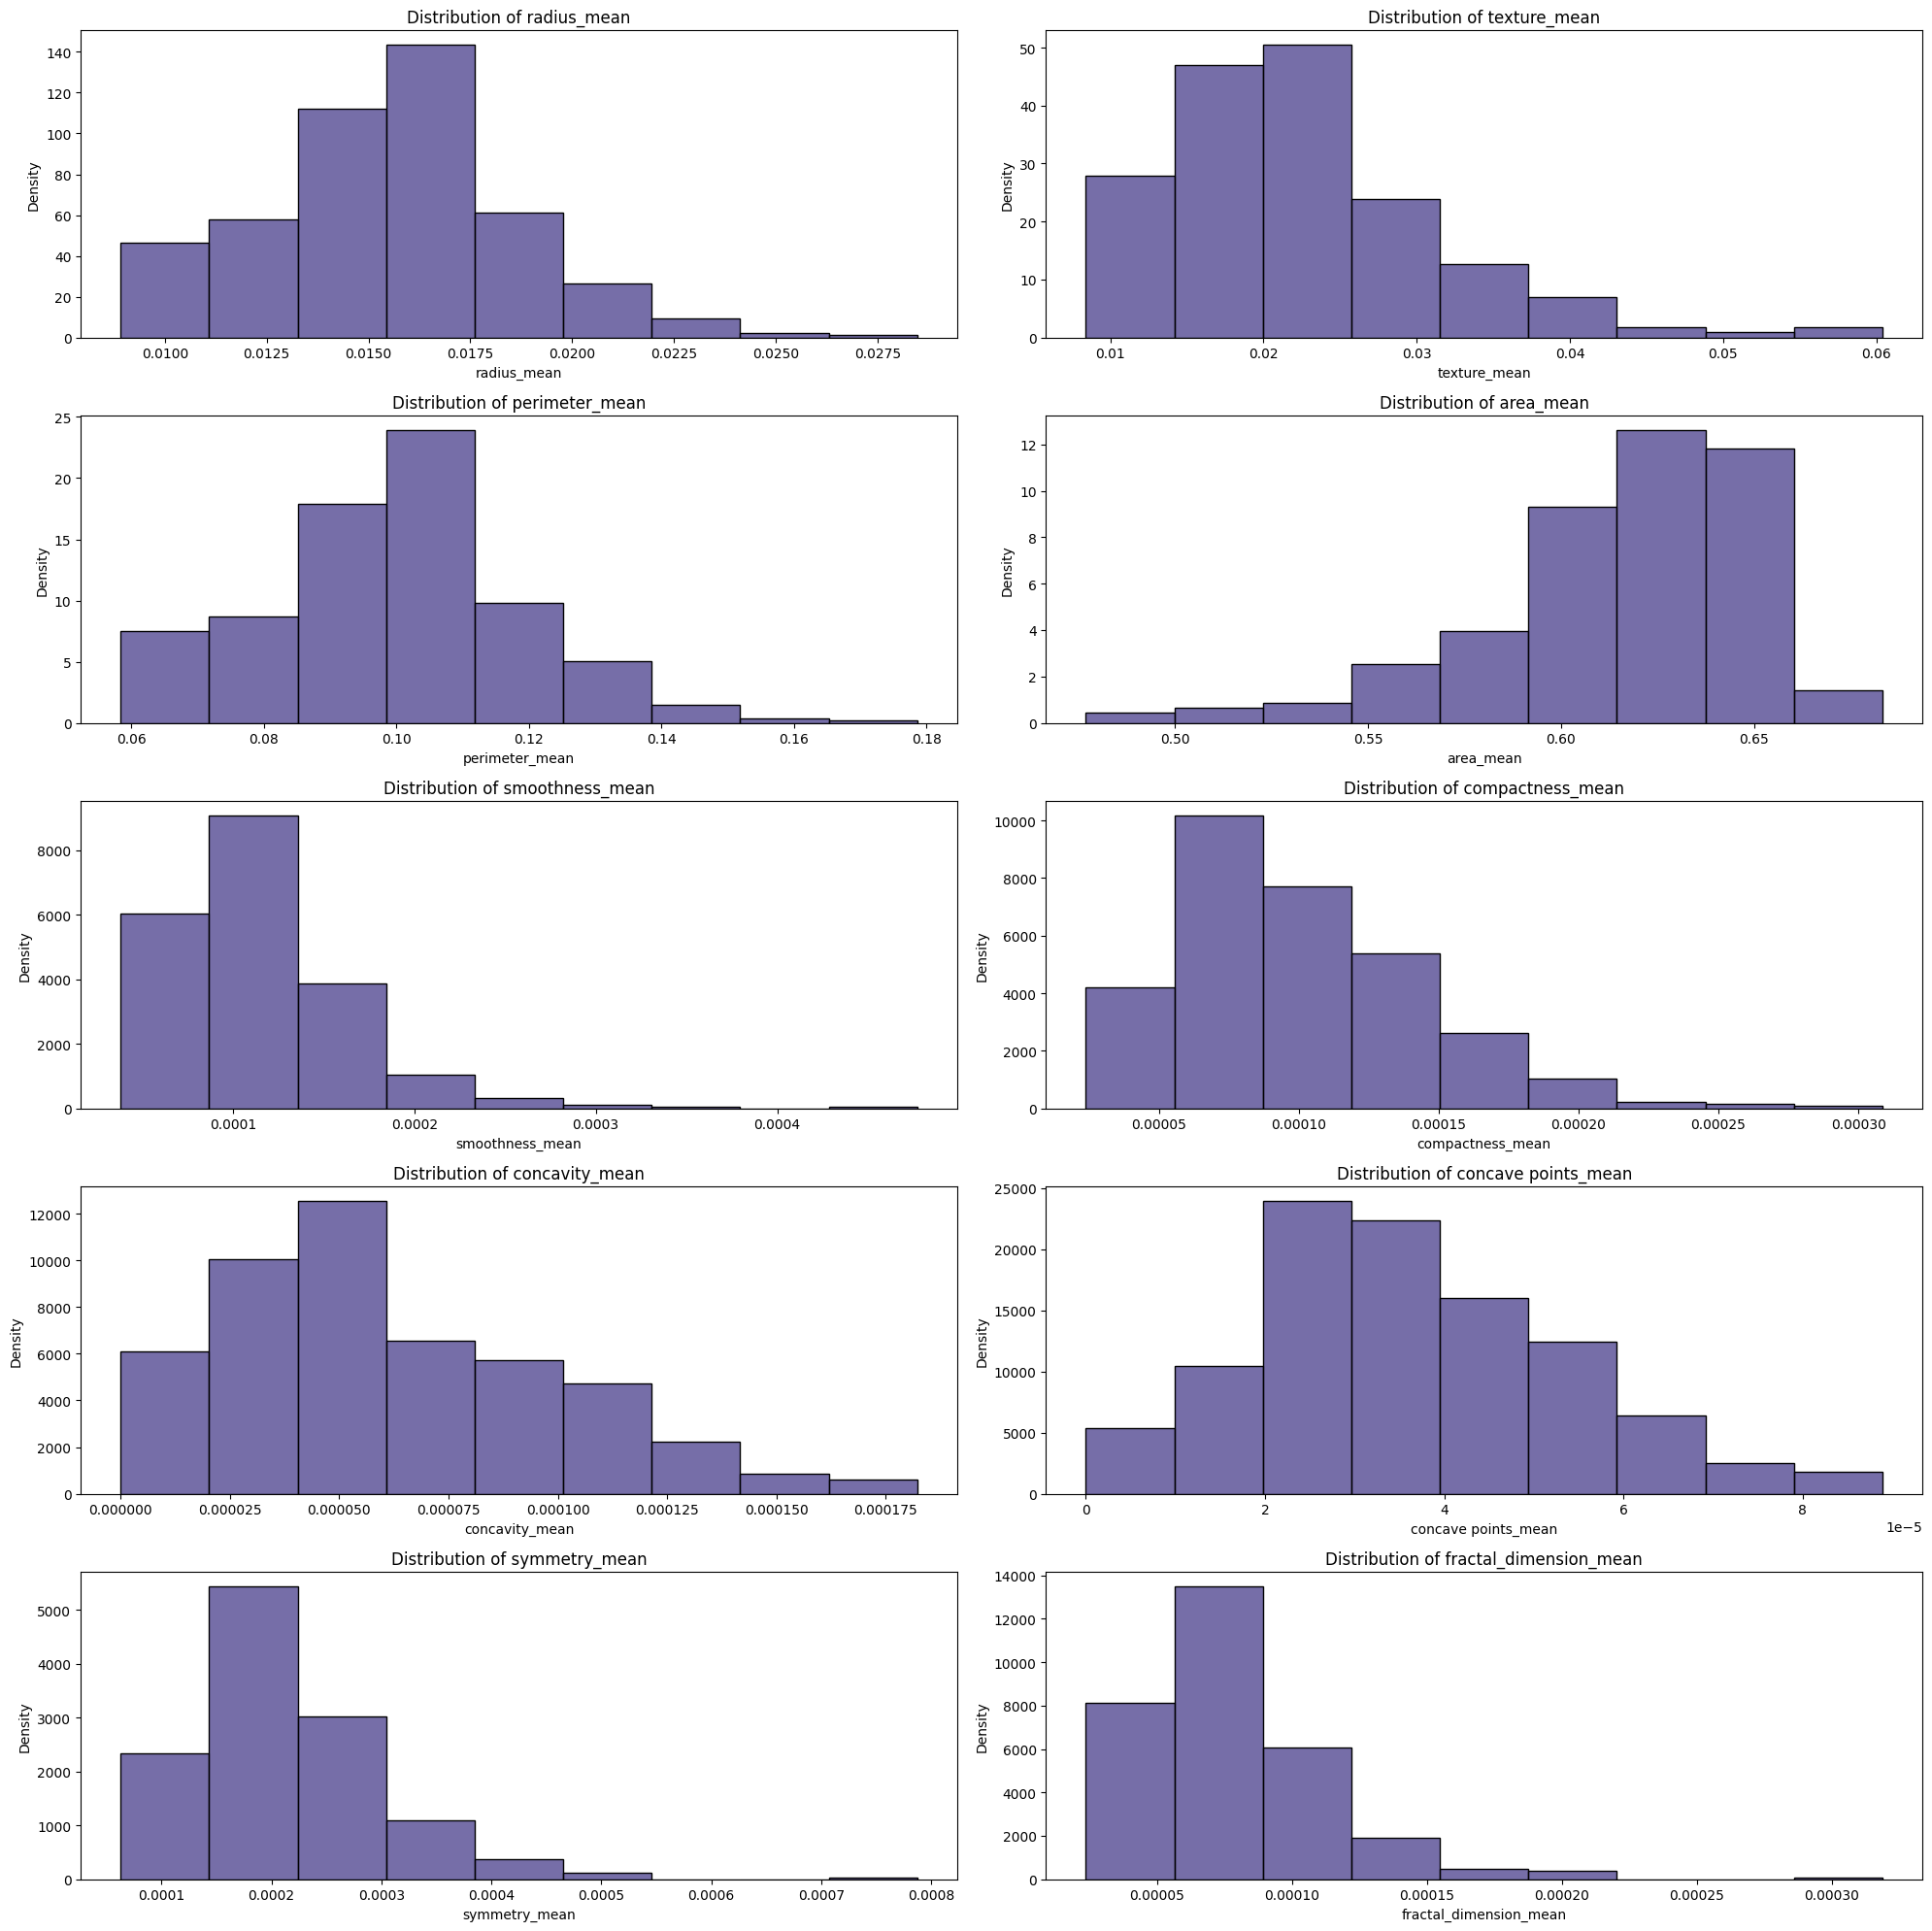

In [14]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(normalized_data.columns[:10]):
    bin_count = 1 + 3.3*math.log(len(normalized_data[column]), 10)
    plt.subplot(5, 2, i+1)
    sns.histplot(normalized_data[column], color='darkslateblue', stat='density', bins=int(bin_count))
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("Density")
    
plt.tight_layout()
plt.show()

### Visualizing standard error features

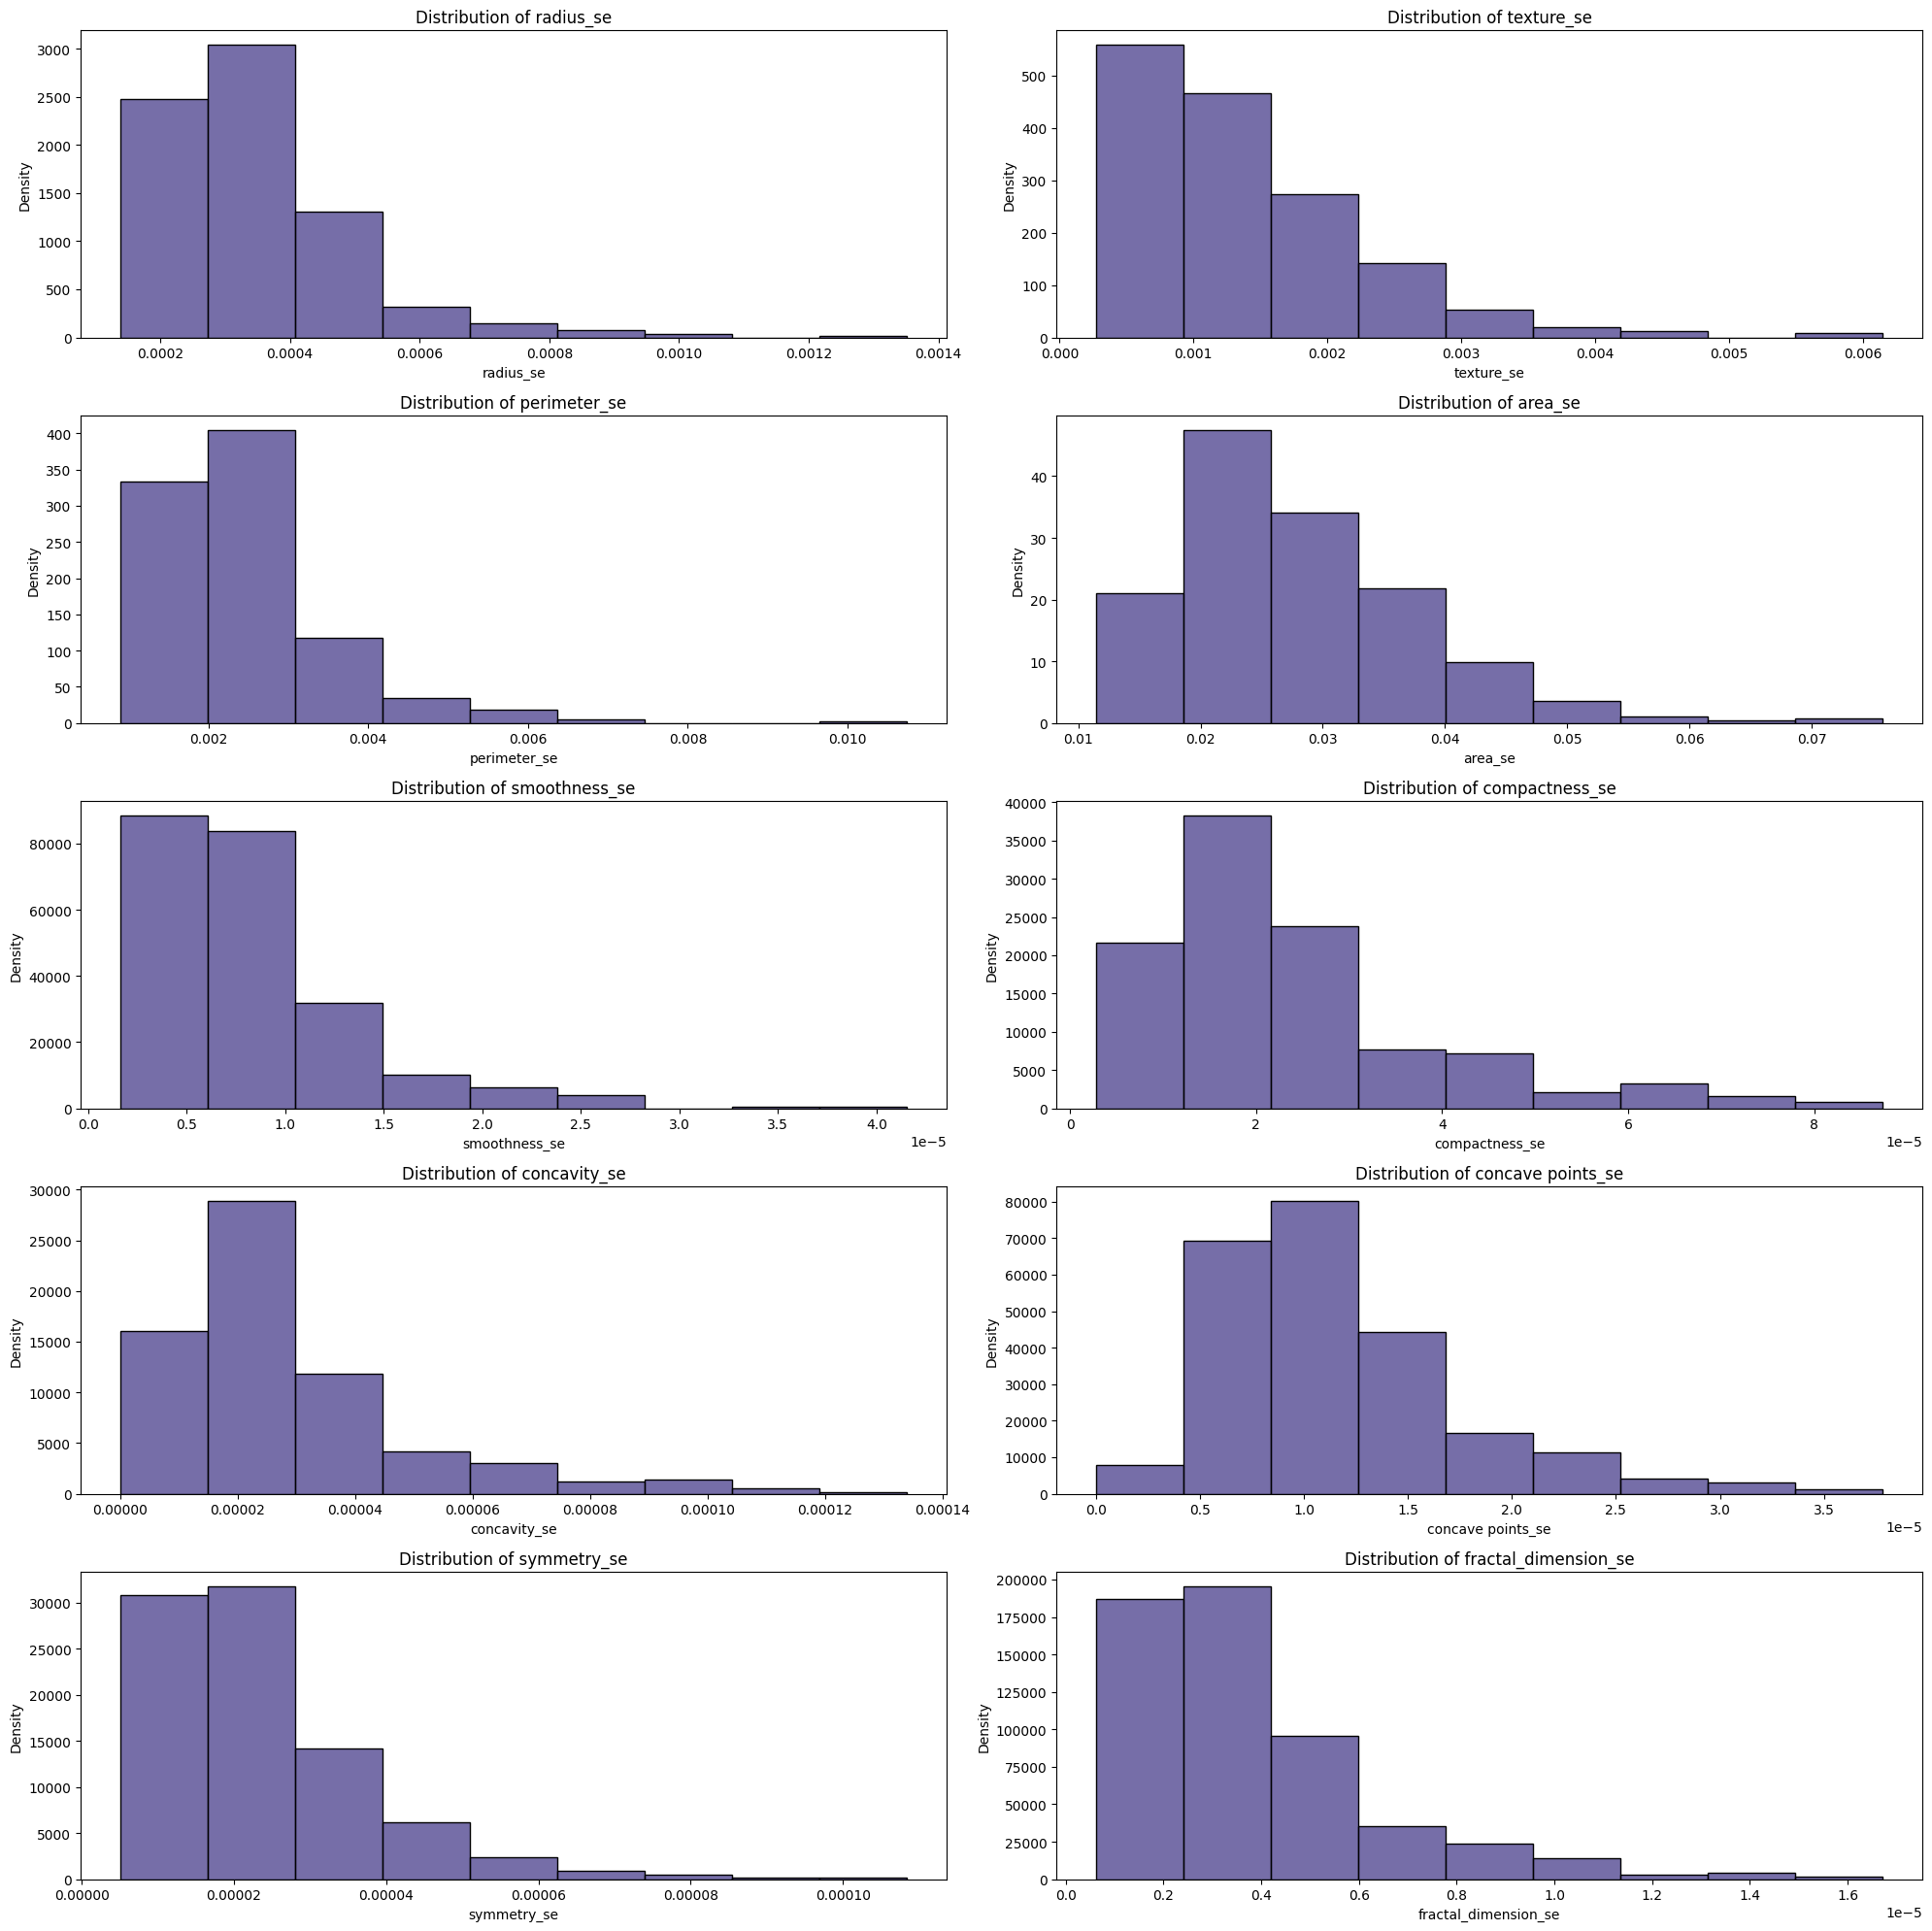

In [15]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(normalized_data.columns[10:20]):
    bin_count = 1 + 3.3*math.log(len(normalized_data[column]), 10)
    plt.subplot(5, 2, i+1)
    sns.histplot(normalized_data[column], color='darkslateblue', stat='density', bins=int(bin_count))
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("Density")
    
plt.tight_layout()
plt.show()

### Visualizing the worst features

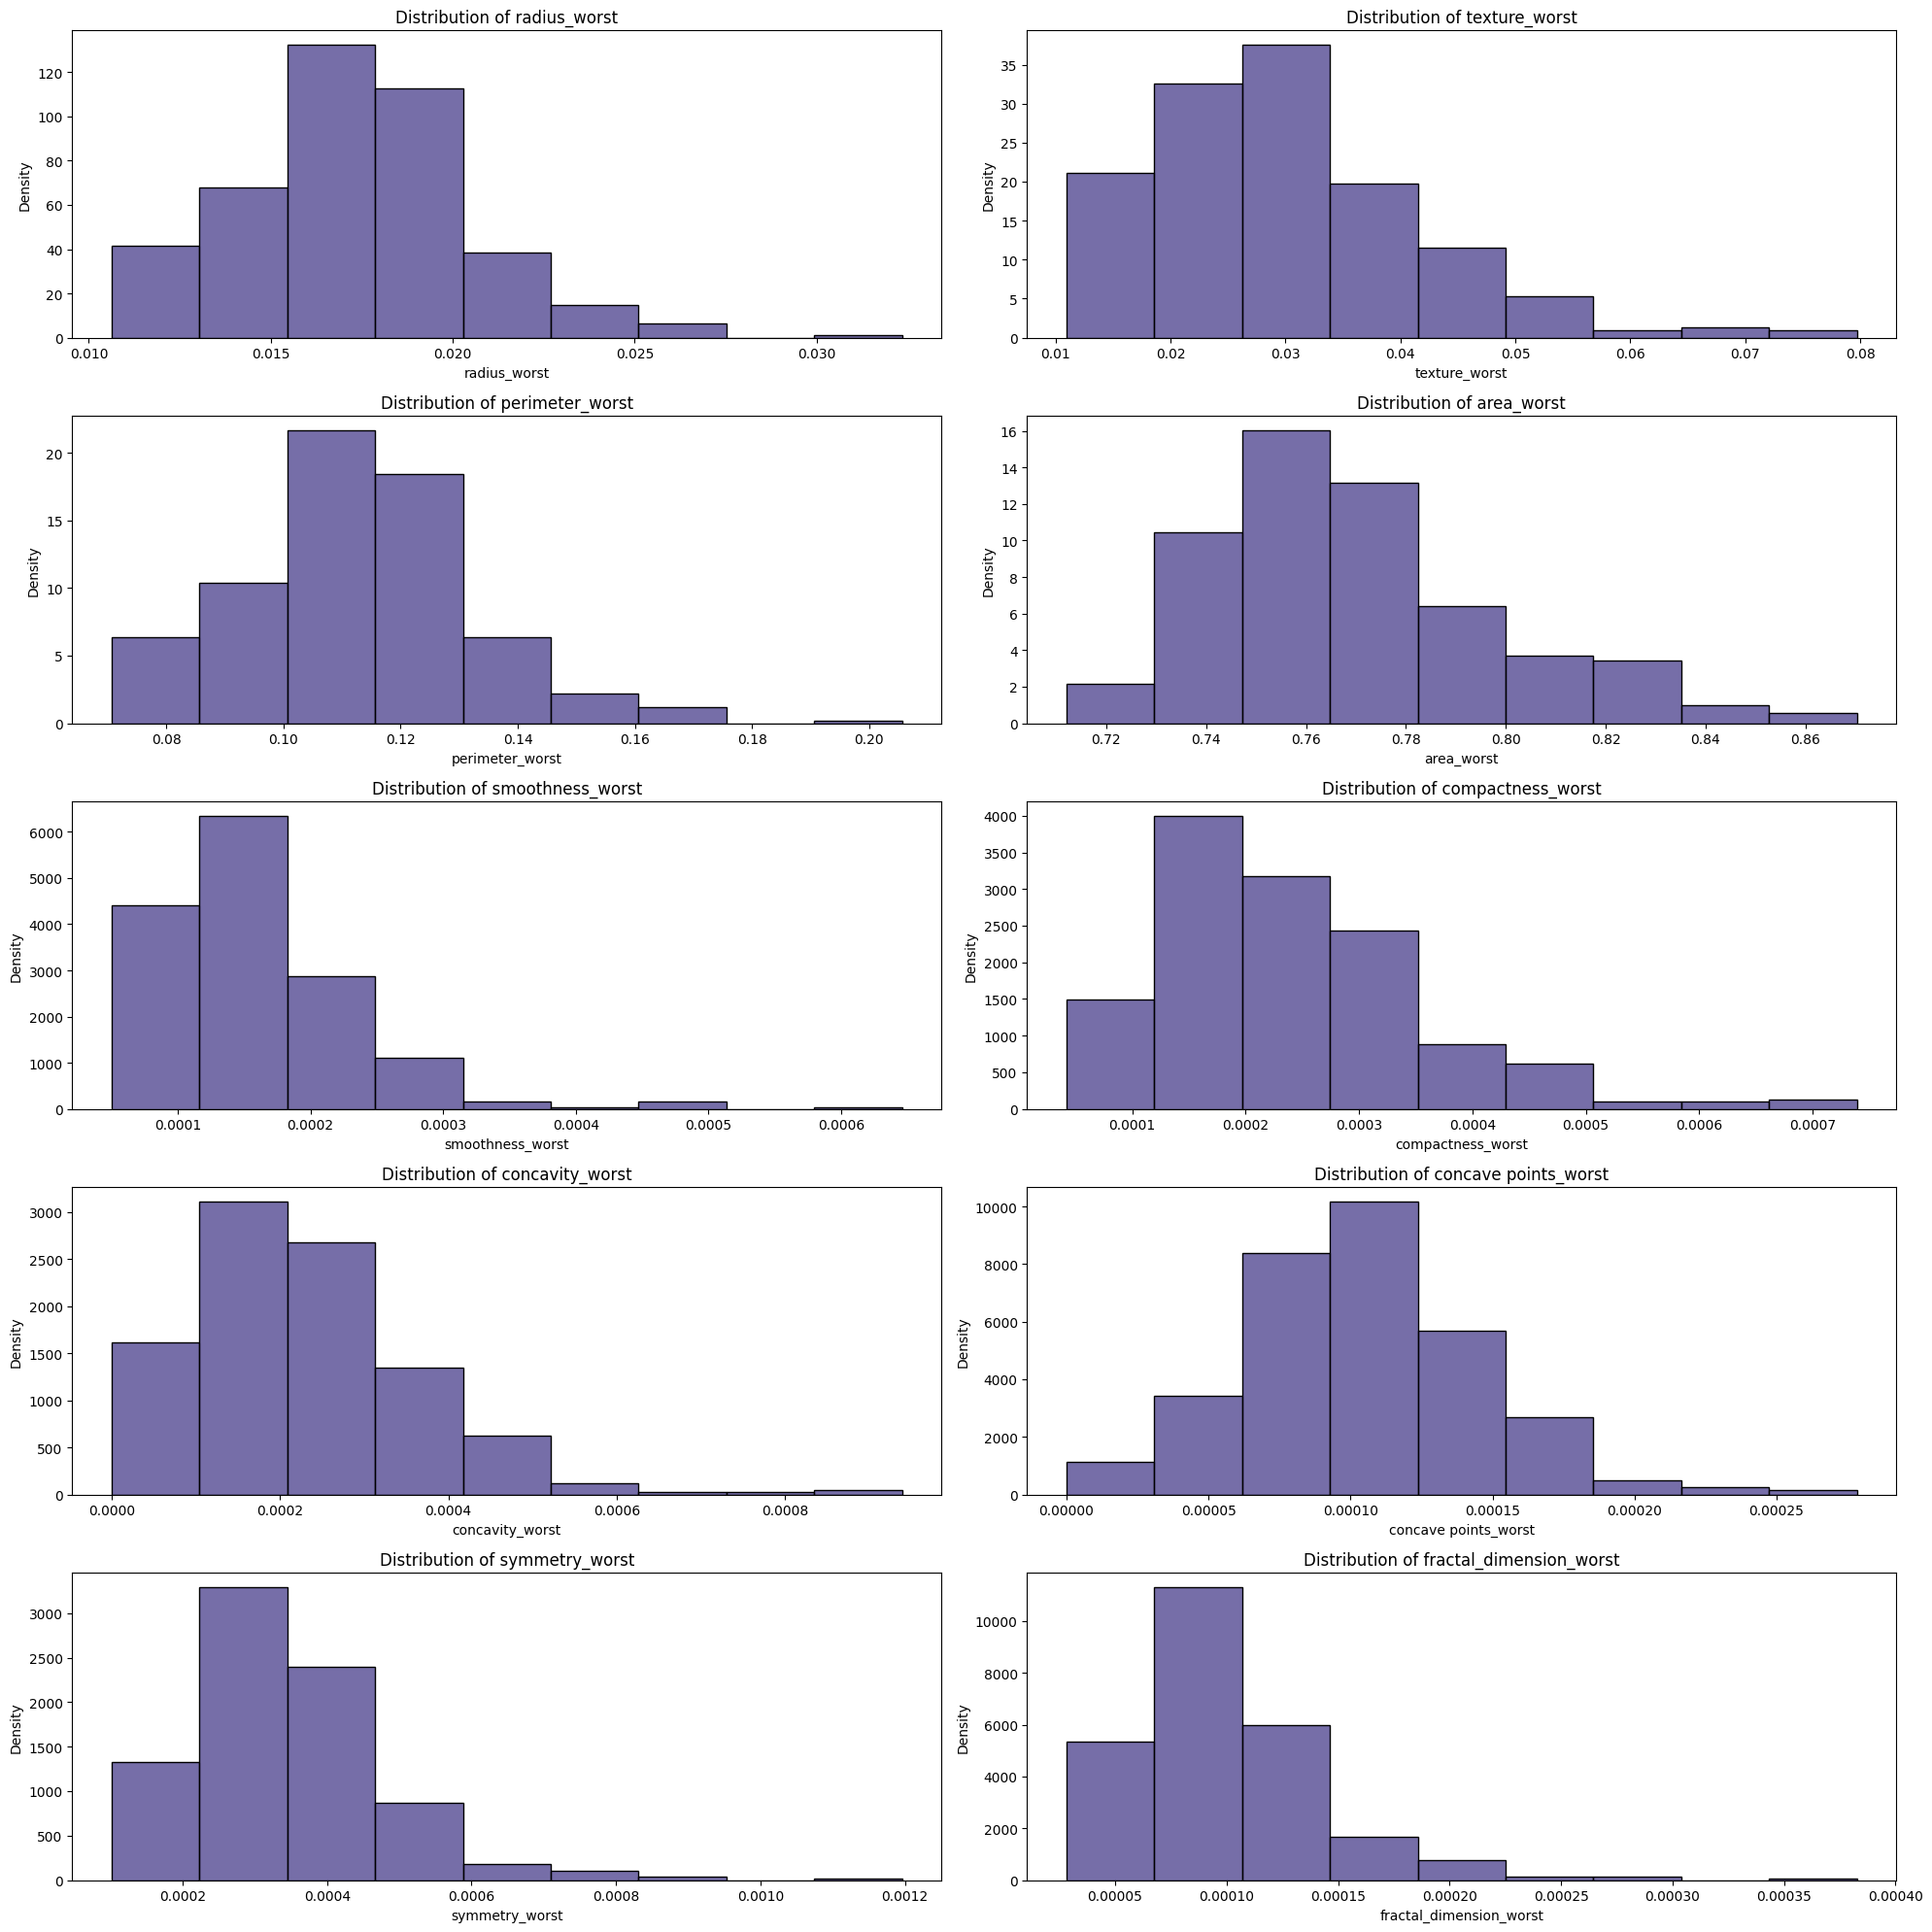

In [16]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(normalized_data.columns[20:30]):
    bin_count = 1 + 3.3*math.log(len(normalized_data[column]), 10)
    plt.subplot(5, 2, i+1)
    sns.histplot(normalized_data[column], color='darkslateblue', stat='density', bins=int(bin_count))
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("Density")
    
plt.tight_layout()
plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [17]:
# self plagiarism from my previous assignment


def my_train_test_split(data, train_size=0.7):
    train_data = data.sample(frac=train_size, random_state=42)
    test_data = data.drop(train_data.index)
    return train_data, test_data

In [18]:
train_data, test_data = my_train_test_split(normalized_data)

## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

### For p = 1: Manhattan Distance

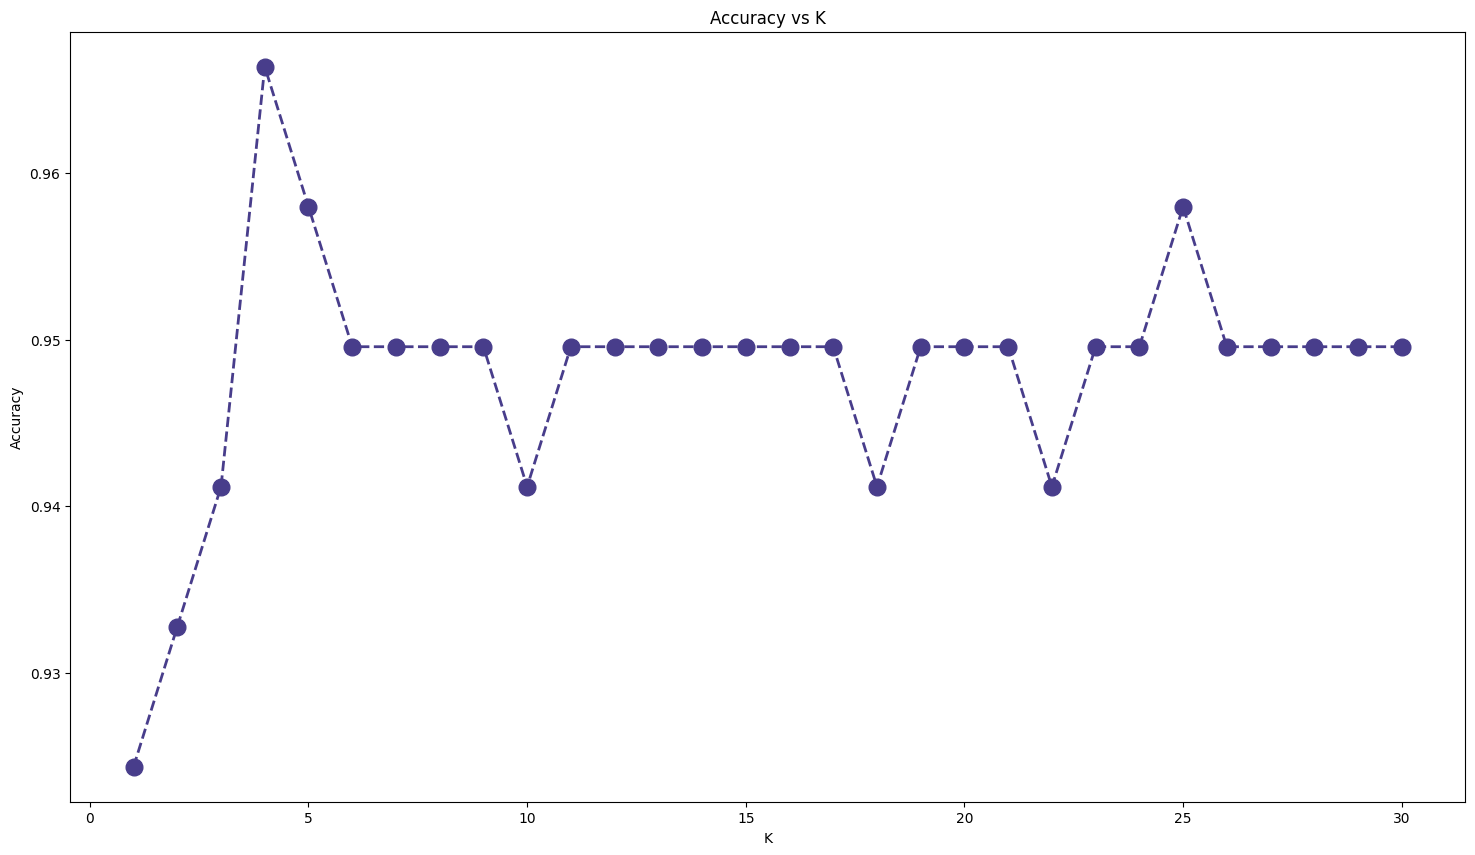

In [20]:
p1_scores = {}
p1_predictions = {}
p1_proba = {}

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k, p=1, algorithm='ball_tree')
    knn.fit(train_data.iloc[:, :-1], train_data['diagnosis'])
    p1_scores[k] = (knn.score(test_data.iloc[:, :-1], test_data['diagnosis']))
    p1_predictions[k] = knn.predict(test_data.iloc[:, :-1])
    p1_proba[k] = knn.predict_proba(test_data.iloc[:, :-1])

plt.figure(figsize=(18, 10))
plt.plot(list(p1_scores.keys()), list(p1_scores.values()), color='darkslateblue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [21]:
while max(p1_scores, key=p1_scores.get) % 2 == 0:
    del p1_scores[max(p1_scores, key=p1_scores.get)]
else:
    print(f"The highest accuracy is {max(p1_scores.values())} and it is achieved at k = {max(p1_scores, key=p1_scores.get)}.")

p1_accuracy = max(p1_scores.values())

The highest accuracy is 0.957983193277311 and it is achieved at k = 5.


### For p = 2: Euclidian Distance

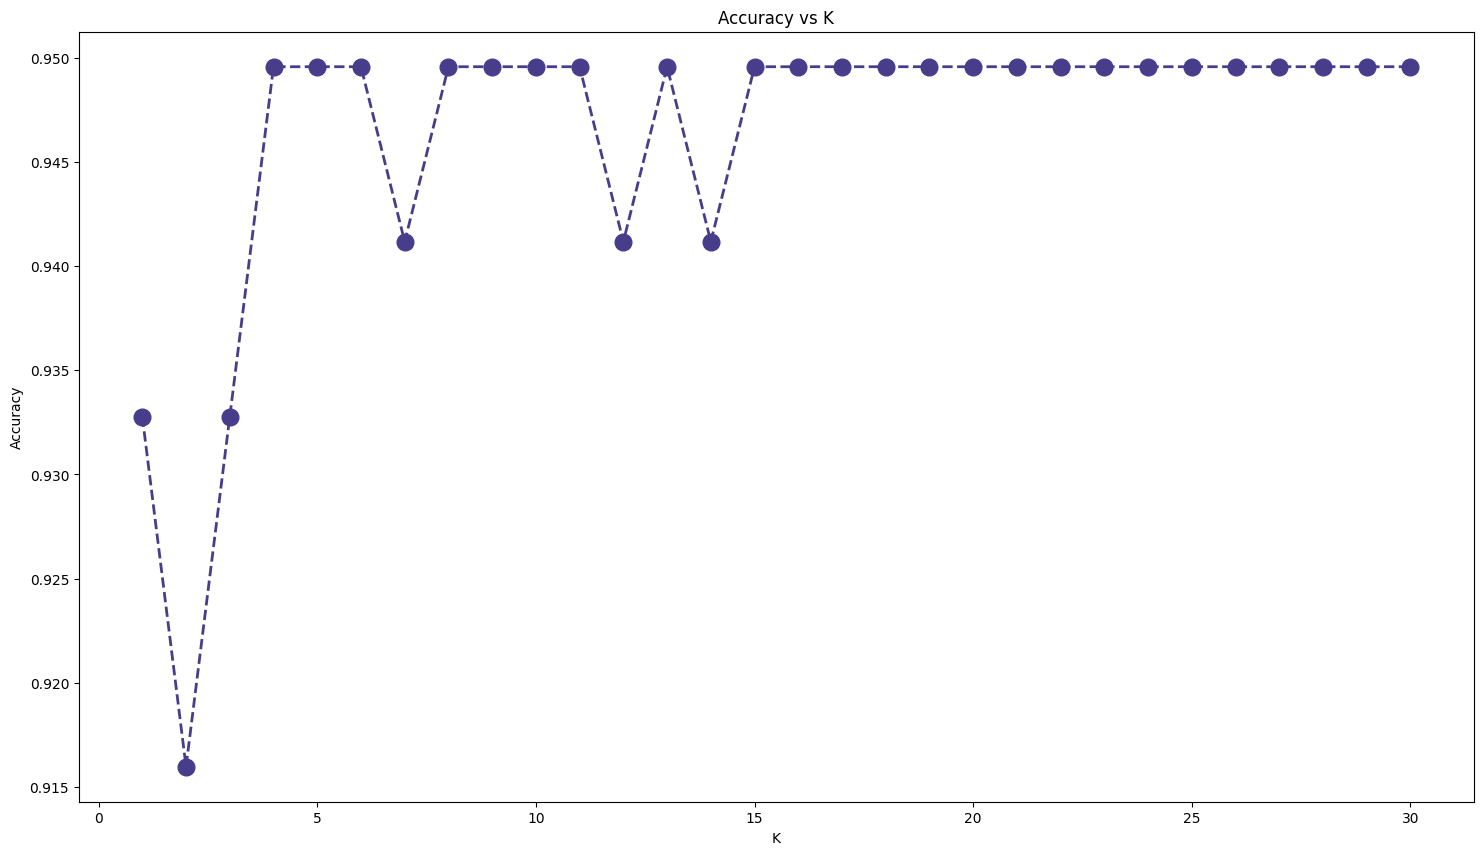

In [22]:
p2_scores = {}
p2_predictions = {}
p2_proba = {}

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, algorithm='ball_tree')
    knn.fit(train_data.iloc[:, :-1], train_data['diagnosis'])
    p2_scores[k] = (knn.score(test_data.iloc[:, :-1], test_data['diagnosis']))
    p2_predictions[k] = knn.predict(test_data.iloc[:, :-1])
    p2_proba[k] = knn.predict_proba(test_data.iloc[:, :-1])

plt.figure(figsize=(18, 10))
plt.plot(list(p2_scores.keys()), list(p2_scores.values()), color='darkslateblue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [23]:
while max(p2_scores, key=p2_scores.get) % 2 == 0:
    del p2_scores[max(p2_scores, key=p2_scores.get)]
else:
    print(f"The highest accuracy is {max(p2_scores.values())} and it is achieved at k = {max(p2_scores, key=p2_scores.get)}.")

p2_accuracy = max(p2_scores.values())

The highest accuracy is 0.9495798319327731 and it is achieved at k = 5.


### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_data.iloc[:, :-1], train_data['diagnosis'])

lr_predictions = logistic_regression.predict(test_data.iloc[:, :-1])
lr_proba = logistic_regression.predict_proba(test_data.iloc[:, :-1])

lr_accuracy = accuracy_score(test_data['diagnosis'], lr_predictions)
print(f"The accuracy of the model is {lr_accuracy}.")

The accuracy of the model is 0.7983193277310925.


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

In [26]:
from sklearn.metrics import confusion_matrix

### Manhattan Distance Model

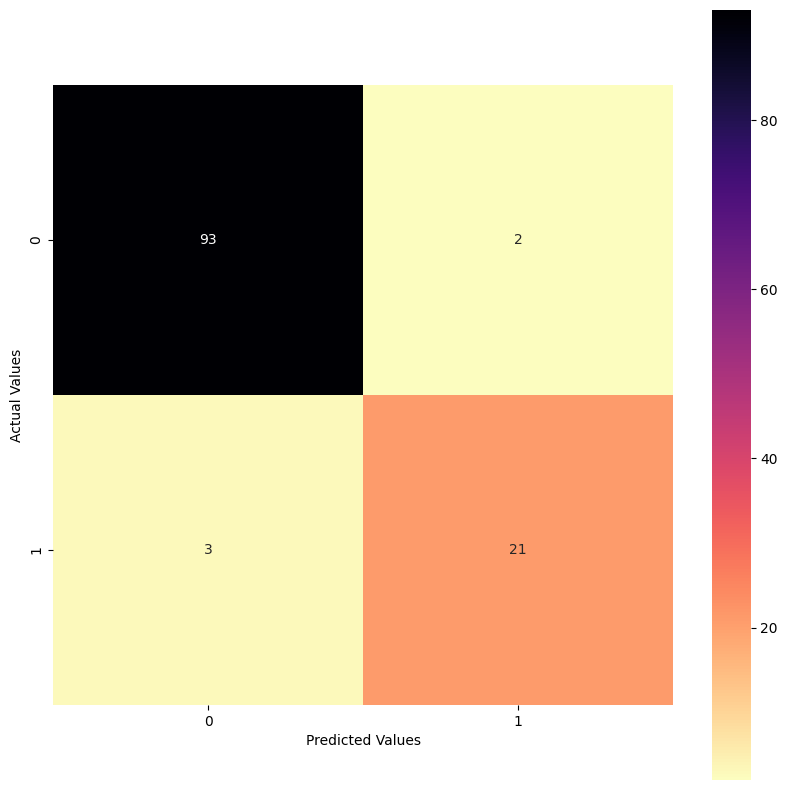

In [27]:
p1_matrix = confusion_matrix(test_data['diagnosis'], p1_predictions[5])

plt.figure(figsize=(10, 10))
sns.heatmap(p1_matrix, annot=True, cmap='magma_r', square=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [28]:
p1_precision = p1_matrix[1][1]/(p1_matrix[1][1] + p1_matrix[0][1])
p1_recall = p1_matrix[1][1]/(p1_matrix[1][1] + p1_matrix[1][0])
p1_f1_score = 2*p1_precision*p1_recall/(p1_precision + p1_recall)

In [29]:
print(f"Accuracy for Manhattan Distance Model is: {p1_accuracy}.")
print(f"Precision for Manhattan Distance Model is: {p1_precision}.")
print(f"Recall for Manhattan Distance Model is: {p1_recall}.")
print(f"F1 Score for Manhattan Distance Model is: {p1_f1_score}.")

Accuracy for Manhattan Distance Model is: 0.957983193277311.
Precision for Manhattan Distance Model is: 0.9130434782608695.
Recall for Manhattan Distance Model is: 0.875.
F1 Score for Manhattan Distance Model is: 0.8936170212765957.


Here we see:
- TP = 21
- TN = 93
- FP = 2
- FN = 3

The majority of predictions are correct by far with only 5 wrong predictions. This is a good sign for model evaluation. This dataset seems suitable for kNN classification and this result proves that too.

### Euclidian Distance Model

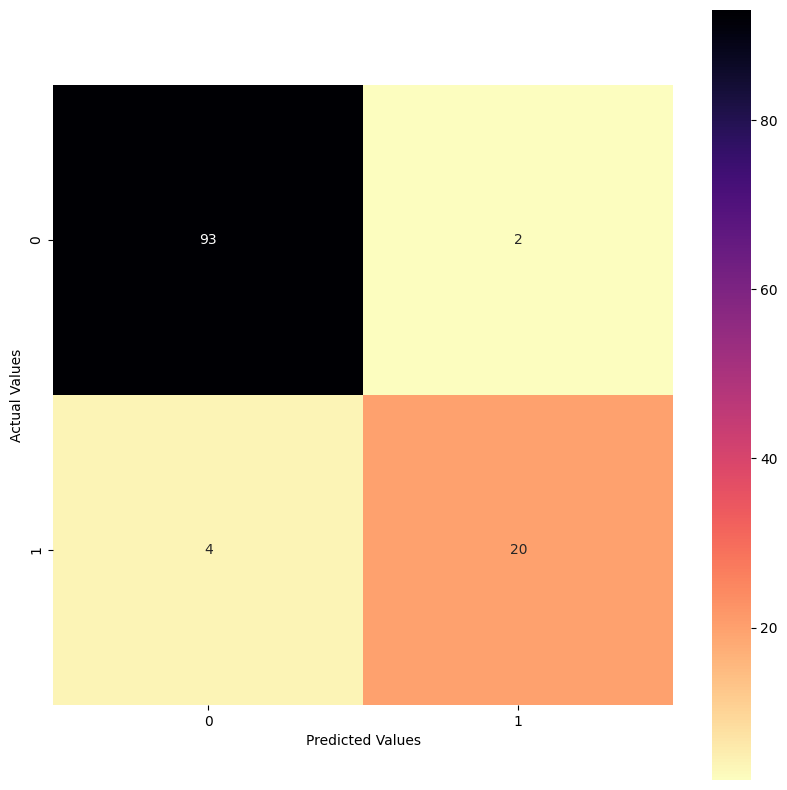

In [30]:
p2_matrix = confusion_matrix(test_data['diagnosis'], p2_predictions[5])

plt.figure(figsize=(10, 10))
sns.heatmap(p2_matrix, annot=True, cmap='magma_r', square=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [31]:
p2_precision = p2_matrix[1][1]/(p2_matrix[1][1] + p2_matrix[0][1])
p2_recall = p2_matrix[1][1]/(p2_matrix[1][1] + p2_matrix[1][0])
p2_f1_score = 2*p2_precision*p2_recall/(p2_precision + p2_recall)

In [32]:
print(f"Accuracy for Euclidean Distance Model is: {p2_accuracy}.")
print(f"Precision for Euclidean Distance Model is: {p2_precision}.")
print(f"Recall for Euclidean Distance Model is: {p2_recall}.")
print(f"F1 Score for Euclidean Distance Model is: {p2_f1_score}.")

Accuracy for Euclidean Distance Model is: 0.9495798319327731.
Precision for Euclidean Distance Model is: 0.9090909090909091.
Recall for Euclidean Distance Model is: 0.8333333333333334.
F1 Score for Euclidean Distance Model is: 0.8695652173913043.


Here we see:
- TP = 20
- TN = 93
- FP = 2
- FN = 4

The majority of predictions are correct by far with only 6 wrong predictions. Euclidian Distance is pretty successfull too. But inspecting the metrics, Manhattan Distance seems slightly better. Because of this, Manhattan Distance Model will be used from now on.

### Logistic Regression Model

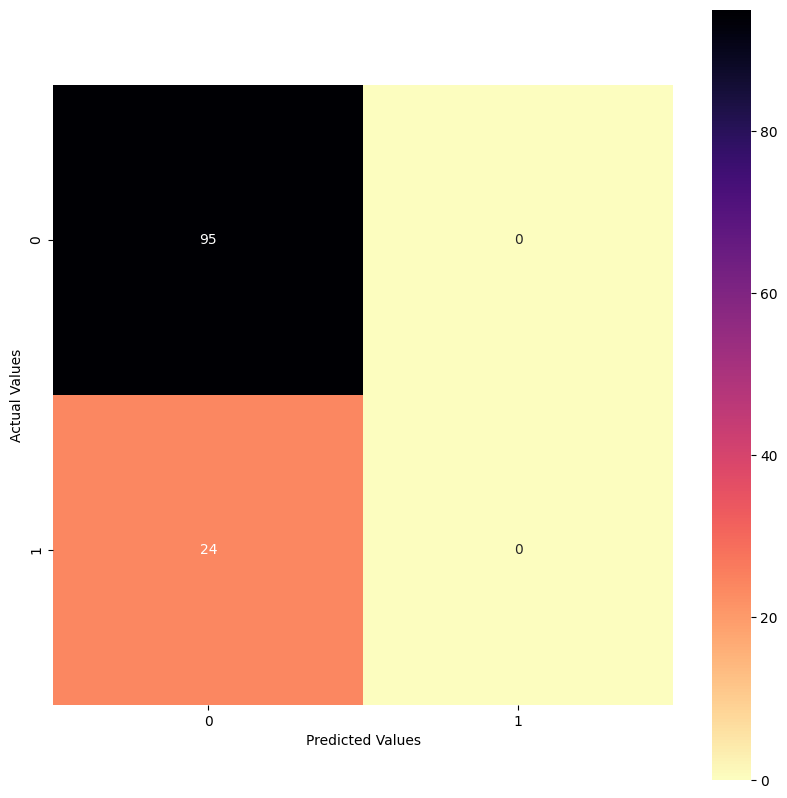

In [33]:
lr_matrix = confusion_matrix(test_data['diagnosis'], lr_predictions)

plt.figure(figsize=(10, 10))
sns.heatmap(lr_matrix, annot=True, cmap='magma_r', square=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [34]:
lr_precision = lr_matrix[1][1]/(lr_matrix[1][1] + lr_matrix[0][1] + 1e-10)
lr_recall = lr_matrix[1][1]/(lr_matrix[1][1] + lr_matrix[1][0])
lr_f1_score = 2*lr_precision*lr_recall/(lr_precision + lr_recall + 1e-10)

In [35]:
print(f"Accuracy for Logistic Regression Model is: {lr_accuracy}.")
print(f"Precision for Logistic Regression Model is: {lr_precision}.")
print(f"Recall for Logistic Regression Model is: {lr_recall}.")
print(f"F1 Score for Logistic Regression Model is: {lr_f1_score}.")

Accuracy for Logistic Regression Model is: 0.7983193277310925.
Precision for Logistic Regression Model is: 0.0.
Recall for Logistic Regression Model is: 0.0.
F1 Score for Logistic Regression Model is: 0.0.


Here we have some interesting (and actually, rather bad) results:
- TP = 0
- TN = 95
- FP = 24
- FN = 0

That big of a TN prediction might seem good at first, but then we realize that the model has predicted all features as 0. That is a bad thing. That may be caused by the bias of the data, since logistic regression is quite sensitive to an imbalanced dataset.

Let's investigate this.

In [36]:
outlier_removed_df['diagnosis'].value_counts()

diagnosis
0    300
1     98
Name: count, dtype: int64

We see, 0 values are thrice as much as 1 values. Let's try to undersample the majority class.

In [37]:
%pip install imbalanced-learn

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X_under, y_under = undersample.fit_resample(outlier_removed_df.iloc[:, 1:], outlier_removed_df['diagnosis'])

normalized_data_under = normalize(X_under)
normalized_data_under = pd.DataFrame(normalized_data_under, columns=outlier_removed_df.columns[1:])

normalized_data_under.reset_index(drop=True, inplace=True)
y_under.reset_index(drop=True, inplace=True)

normalized_data_under['diagnosis'] = y_under
normalized_data_under

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.018044,0.027507,0.115911,0.609954,0.000176,0.000128,0.000050,0.000041,0.000280,0.000104,...,0.043213,0.130637,0.770451,0.000224,0.000242,0.000174,0.000121,0.000490,0.000129,0
1,0.018129,0.022684,0.117836,0.657819,0.000125,0.000149,0.000104,0.000041,0.000231,0.000104,...,0.027178,0.125464,0.731631,0.000166,0.000431,0.000415,0.000163,0.000402,0.000153,0
2,0.016604,0.018189,0.107474,0.657395,0.000121,0.000127,0.000048,0.000027,0.000211,0.000093,...,0.021615,0.111692,0.736262,0.000146,0.000252,0.000185,0.000075,0.000311,0.000129,0
3,0.017170,0.026230,0.108873,0.629281,0.000119,0.000068,0.000028,0.000019,0.000269,0.000088,...,0.030673,0.120320,0.758129,0.000165,0.000128,0.000132,0.000091,0.000400,0.000107,0
4,0.015702,0.030013,0.099963,0.639358,0.000104,0.000062,0.000033,0.000025,0.000192,0.000066,...,0.040686,0.108509,0.752276,0.000153,0.000126,0.000165,0.000071,0.000290,0.000081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.012484,0.015819,0.080677,0.582226,0.000076,0.000071,0.000062,0.000036,0.000129,0.000049,...,0.023276,0.094397,0.802127,0.000103,0.000174,0.000238,0.000093,0.000189,0.000058,1
192,0.009964,0.011199,0.065735,0.572463,0.000058,0.000068,0.000085,0.000051,0.000101,0.000032,...,0.014257,0.077381,0.812441,0.000081,0.000138,0.000205,0.000082,0.000167,0.000043,1
193,0.009669,0.009849,0.063440,0.590163,0.000050,0.000064,0.000069,0.000046,0.000088,0.000030,...,0.012265,0.078024,0.800172,0.000069,0.000161,0.000203,0.000078,0.000124,0.000044,1
194,0.014647,0.023145,0.096246,0.646429,0.000107,0.000118,0.000150,0.000063,0.000198,0.000061,...,0.035175,0.107054,0.747530,0.000142,0.000281,0.000435,0.000140,0.000277,0.000086,1


In [40]:
train_data_under, test_data_under = my_train_test_split(normalized_data_under)

logistic_regression_under = LogisticRegression()
logistic_regression_under.fit(train_data_under.iloc[:, :-1], train_data_under['diagnosis'])

lr_predictions_under = logistic_regression_under.predict(test_data_under.iloc[:, :-1])
lr_proba_under = logistic_regression_under.predict_proba(test_data_under.iloc[:, :-1])

lr_accuracy_under = accuracy_score(test_data_under['diagnosis'], lr_predictions_under)
print(f"The accuracy of the model is {lr_accuracy_under}.")

The accuracy of the model is 0.8305084745762712.


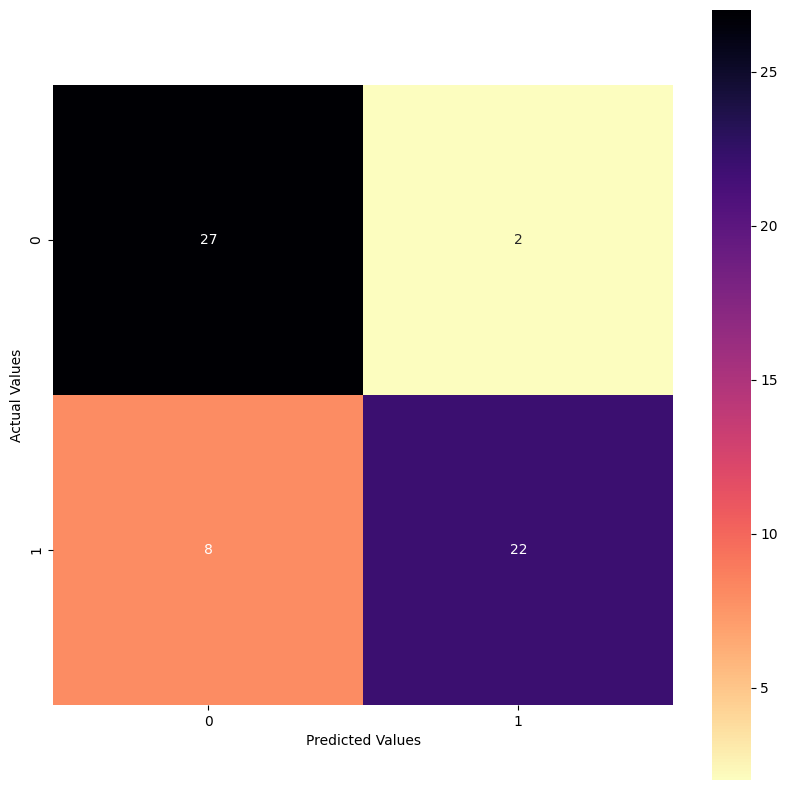

In [41]:
undersampled_matrix = confusion_matrix(test_data_under['diagnosis'], lr_predictions_under)

plt.figure(figsize=(10, 10))
sns.heatmap(undersampled_matrix, annot=True, cmap='magma_r', square=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [42]:
lr_precision_under = undersampled_matrix[1][1]/(undersampled_matrix[1][1] + undersampled_matrix[0][1])
lr_recall_under = undersampled_matrix[1][1]/(undersampled_matrix[1][1] + undersampled_matrix[1][0])
lr_f1_score_under = 2*lr_precision_under*lr_recall_under/(lr_precision_under + lr_recall_under)

In [43]:
print(f"Accuracy for Undersampled Logistic Regression Model is: {lr_accuracy_under}.")
print(f"Precision for Undersampled Logistic Regression Model is: {lr_precision_under}.")
print(f"Recall for Undersampled Logistic Regression Model is: {lr_recall_under}.")
print(f"F1 Score for Undersampled Logistic Regression Model is: {lr_f1_score_under}.")

Accuracy for Undersampled Logistic Regression Model is: 0.8305084745762712.
Precision for Undersampled Logistic Regression Model is: 0.9166666666666666.
Recall for Undersampled Logistic Regression Model is: 0.7333333333333333.
F1 Score for Undersampled Logistic Regression Model is: 0.8148148148148148.


Now, let's try oversampling too.

In [44]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

X_over, y_over = oversample.fit_resample(outlier_removed_df.iloc[:, 1:], outlier_removed_df['diagnosis'])

normalized_data_over = normalize(X_over)
normalized_data_over = pd.DataFrame(normalized_data_over, columns=outlier_removed_df.columns[1:])
normalized_data_over.reset_index(drop=True, inplace=True)
y_over.reset_index(drop=True, inplace=True)

normalized_data_over['diagnosis'] = y_over
normalized_data_over

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.009483,0.010382,0.062147,0.540411,0.000049,0.000057,0.000059,0.000038,0.000093,0.000030,...,0.014373,0.079607,0.834520,0.000075,0.000134,0.000197,0.000100,0.000159,0.000043,1
1,0.012712,0.019313,0.083631,0.535813,0.000110,0.000153,0.000087,0.000055,0.000204,0.000069,...,0.026091,0.102545,0.831674,0.000153,0.000341,0.000248,0.000144,0.000296,0.000107,1
2,0.011360,0.016479,0.072824,0.565713,0.000058,0.000047,0.000023,0.000024,0.000108,0.000040,...,0.024024,0.087786,0.815455,0.000084,0.000110,0.000103,0.000071,0.000209,0.000060,1
3,0.010335,0.011717,0.067850,0.511496,0.000064,0.000085,0.000065,0.000043,0.000121,0.000040,...,0.017866,0.089397,0.850747,0.000091,0.000367,0.000260,0.000119,0.000248,0.000069,1
4,0.013360,0.020188,0.087412,0.659763,0.000071,0.000084,0.000084,0.000045,0.000156,0.000045,...,0.023316,0.094408,0.738830,0.000095,0.000162,0.000196,0.000094,0.000237,0.000053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.008985,0.011971,0.058796,0.569817,0.000044,0.000048,0.000067,0.000041,0.000080,0.000025,...,0.017325,0.071802,0.815793,0.000067,0.000130,0.000168,0.000075,0.000139,0.000035,1
596,0.009558,0.011350,0.062267,0.556885,0.000049,0.000050,0.000060,0.000035,0.000088,0.000030,...,0.016261,0.075425,0.823671,0.000076,0.000118,0.000205,0.000071,0.000161,0.000039,1
597,0.014647,0.023145,0.096246,0.646429,0.000107,0.000118,0.000150,0.000063,0.000198,0.000061,...,0.035175,0.107054,0.747530,0.000142,0.000281,0.000435,0.000140,0.000277,0.000086,1
598,0.011145,0.012276,0.073136,0.604656,0.000057,0.000076,0.000066,0.000048,0.000096,0.000035,...,0.016419,0.088640,0.787273,0.000088,0.000217,0.000223,0.000123,0.000186,0.000050,1


In [45]:
train_data_over, test_data_over = my_train_test_split(normalized_data_over)

logistic_regression_over = LogisticRegression()
logistic_regression_over.fit(train_data_over.iloc[:, :-1], train_data_over['diagnosis'])

lr_predictions_over = logistic_regression_over.predict(test_data_over.iloc[:, :-1])
lr_proba_over = logistic_regression_over.predict_proba(test_data_over.iloc[:, :-1])

lr_accuracy_over = accuracy_score(test_data_over['diagnosis'], lr_predictions_over)
print(f"The accuracy of the model is {lr_accuracy_over}.")

The accuracy of the model is 0.85.


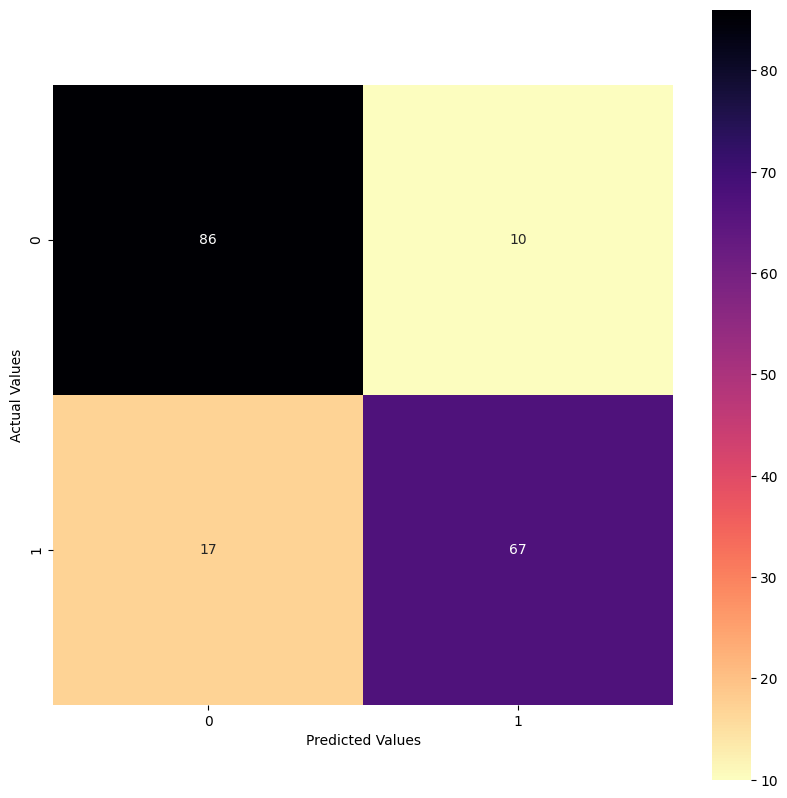

In [47]:
oversampled_matrix = confusion_matrix(test_data_over['diagnosis'], lr_predictions_over)

plt.figure(figsize=(10, 10))
sns.heatmap(oversampled_matrix, annot=True, cmap='magma_r', square=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [48]:
lr_precision_over = oversampled_matrix[1][1]/(oversampled_matrix[1][1] + oversampled_matrix[0][1])
lr_recall_over = oversampled_matrix[1][1]/(oversampled_matrix[1][1] + oversampled_matrix[1][0])
lr_f1_score_over = 2*lr_precision_over*lr_recall_over/(lr_precision_over + lr_recall_over)

In [49]:
print(f"Accuracy for Oversampled Logistic Regression Model is: {lr_accuracy_over}.")
print(f"Precision for Oversampled Logistic Regression Model is: {lr_precision_over}.")
print(f"Recall for Oversampled Logistic Regression Model is: {lr_recall_over}.")
print(f"F1 Score for Oversampled Logistic Regression Model is: {lr_f1_score_over}.")

Accuracy for Oversampled Logistic Regression Model is: 0.85.
Precision for Oversampled Logistic Regression Model is: 0.8701298701298701.
Recall for Oversampled Logistic Regression Model is: 0.7976190476190477.
F1 Score for Oversampled Logistic Regression Model is: 0.8322981366459626.


Now, they are better. They neither predict all entries as 0, thus produce unusable metrics, nor using a biased data. Among them, oversampled one seems to be better for this case, so it will be used from now on.

And for the kNN classifiers, Manhattan Distance found to be slightly better, so it is our choice of kNN classifier.

### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

In [50]:
from sklearn.metrics import precision_recall_curve

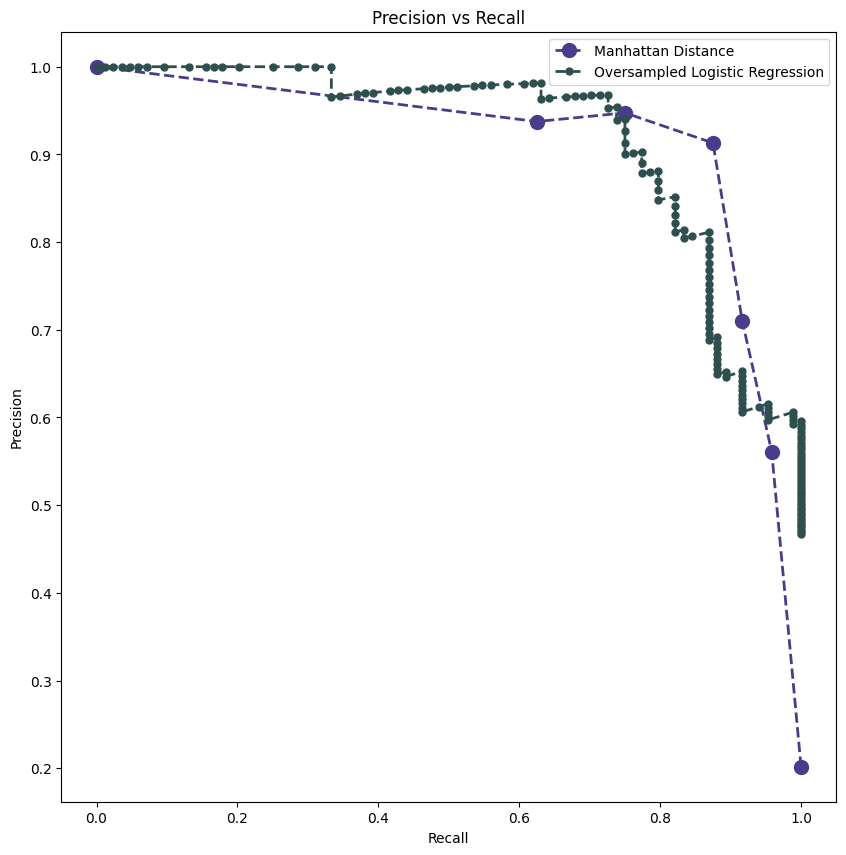

In [51]:
p1_precision, p1_recall_, p1_thresholds = precision_recall_curve(test_data['diagnosis'], p1_proba[5][:, 1])
lr_precision_over, lr_recall_over_, lr_thresholds_over = precision_recall_curve(test_data_over['diagnosis'], lr_proba_over[:, 1])

plt.figure(figsize=(10, 10))
plt.plot(p1_recall_, p1_precision, marker='o', color='darkslateblue', linestyle='dashed', linewidth=2, markersize=10)
plt.plot(lr_recall_over_, lr_precision_over, marker='o', color='darkslategray', linestyle='dashed', linewidth=2, markersize=5)
plt.title("Precision vs Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(["Manhattan Distance", "Oversampled Logistic Regression"])
plt.show()

Since it has a point closer to much-wanted (1,1) point, Manhattan Distance kNN Classifier seems a better classifier option. Let's also compare AUC (area under the curve).

In [52]:
from sklearn.metrics import auc

In [53]:
manhattan_auc = auc(p1_recall_, p1_precision)
lr_over_auc = auc(lr_recall_over_, lr_precision_over)

print(f"The AUC for Manhattan Distance Model is: {manhattan_auc}.")
print(f"The AUC for Oversampled Logistic Regression Model is: {lr_over_auc}.")

The AUC for Manhattan Distance Model is: 0.9157160660385426.
The AUC for Oversampled Logistic Regression Model is: 0.9210729259119249.


It is once again proved that the Manhattan Distance kNN Classifier is the better option.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

In [54]:
print(f"Recall value for Manhattan Distance Model are: {p1_recall}.")
print(f"Recall value for Euclidean Distance Model are: {p2_recall}.")
print(f"Recall value for Logistic Regression Model are: {lr_recall}.")
print(f"Recall value for Undersampled Logistic Regression Model are: {lr_recall_under}.")
print(f"Recall value for Oversampled Logistic Regression Model are: {lr_recall_over}.")

Recall value for Manhattan Distance Model are: 0.875.
Recall value for Euclidean Distance Model are: 0.8333333333333334.
Recall value for Logistic Regression Model are: 0.0.
Recall value for Undersampled Logistic Regression Model are: 0.7333333333333333.
Recall value for Oversampled Logistic Regression Model are: 0.7976190476190477.


Recall value is chosen because this is a disease diagnosis project. A lower recall might point to misdiagnosis of a sick patient, which is a crucial mistake. So, for this dataset, a higher recall value is more important than the others. Thus, Manhattan Distance kNN model found to be the best one among all.